# Question 3

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt # for plots
import h5py # to be able to use v 7.3 .mat file in the Python 
from collections import defaultdict # to store cross validation results efficiently

/Users/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# QUESTION 3
print('QUESTION 3\n')

QUESTION 3



In [3]:
with h5py.File('hw3_data2.mat', 'r') as file:
    data_keys = list(file.keys())

data = dict()
with h5py.File('hw3_data2.mat', 'r') as file:
        for key in data_keys:
            data[key] = np.array(file[key])
            print('Data associated with %s:\n' % key, data[key], '\n')

Data associated with Xn:
 [[ 1.52701832  0.16157787  0.28709502 ...  0.01068474 -0.7308025
  -1.48034961]
 [-0.76904198 -0.1476574  -0.12500706 ...  0.58689498  0.62416562
   0.58964526]
 [ 0.60902472  0.37165935 -0.01411154 ... -0.05499333 -0.2238149
  -0.9915588 ]
 ...
 [ 0.15820847 -0.47116266 -0.38654521 ...  0.80714865  0.70844618
   1.26514569]
 [-0.15492524  0.0927185   0.12305589 ... -0.7178365   0.19367856
   1.6518268 ]
 [-1.31876714 -0.18138183  0.47656    ...  0.54356172 -0.17487675
   0.15155921]] 

Data associated with Yn:
 [[ 8.09733590e-01  4.03151023e-01  3.10795031e-01  1.05111649e+00
   8.00216651e-01  6.46037345e-01  7.14216610e-02  1.83919801e-01
  -3.14820929e-01 -1.82482320e-01  1.45431628e-01  6.32468701e-01
   6.71419873e-01  7.65028353e-02  9.18293694e-01  7.26047842e-01
   1.09795020e+00  2.11850925e-01 -6.74332745e-02 -3.64295217e-01
  -4.73715837e-01 -9.83666953e-01 -1.24066982e+00 -7.76936011e-01
  -8.42436897e-01 -2.48619415e-01 -9.57918863e-02  1.1128571

In [4]:
Yn = data['Yn'].flatten()
Xn = data['Xn'].T
print('Shape of Yn:', np.shape(Yn))
print('Shape of Xn:', np.shape(Xn))

Shape of Yn: (1000,)
Shape of Xn: (1000, 100)


In [5]:
# PART A
print('PART A')

PART A


In [6]:
def ridge(y, X, lambda_):
    """
    Given data labels and regressors, learns an optimal weight
    vector according to the ridge regression formulation.
    Args:
        y: The data labels
        X: The regressors
        lambda_: The regularization parameter
    Returns 
        w_optimal: The optimal weight vector
    """
    K = np.shape(X)[1]
    temp = np.linalg.inv(X.T.dot(X) + lambda_ * np.eye(K))
    w_optimal = temp.dot(X.T).dot(y)
    return w_optimal

In [7]:
def compute_R2(Y, pred):
    """
    Tests a given linearized model by computing the coefficient
    of determination (R^2). Returns R^2. R^2 is computed as the
    square of the Pearson correlation between the labels and
    the predictions.
    Args:
        Y: The data labels
        pred: The predicted valus
    Returns:
        R2: The coefficient of determination
    """
    pearson = np.corrcoef(Y, pred)[0, 1]
    R2 = pearson ** 2
    return R2

In [8]:
def cross_validation(y, X, k_fold, lambda_arr):
    """
    Performs k fold cross validation with three way split in each
    iteration. The aim is to tune the ridge regression's regularizer,
    lambda. Hence each value in an array of lambda values is integrated
    into the model and coefficient of determination (R^2) is calculated
    for each case. 
    Args:
        y: The data labels
        X: The regressors
        k_fold: Number of folds in cross validation
        lambda_arr: The regularization parameters to select from
    Returns:
        double_dict_valid: The R^2 values calculated in the validation
            set for each fold and lambda value, stored as a dictionary.
        double_dict_test: The R^2 values calculated in the test set 
            for each fold and lambda value, stored as a dictionary.
    """
    N = np.size(y)
    idx_unit = int(N / k_fold) 
    double_dict_valid = defaultdict(dict)
    double_dict_test = defaultdict(dict)
    for i in range(k_fold):
        valid_start = i * idx_unit
        test_start = (i + 1) * idx_unit
        train_start = (i + 2) * idx_unit
        valid_indices = np.arange(valid_start, test_start) % N
        test_indices = np.arange(test_start, train_start) % N
        train_indices = np.arange(train_start, N + valid_start) % N
        y_valid = y[valid_indices]
        X_valid = X[valid_indices]
        y_test = y[test_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        X_train = X[train_indices]
        for lambda_ in lambda_arr:
            w = ridge(y_train, X_train, lambda_)
            double_dict_valid[i][lambda_] = compute_R2(y_valid, X_valid.dot(w))
            double_dict_test[i][lambda_] = compute_R2(y_test, X_test.dot(w))
    return double_dict_valid, double_dict_test

In [9]:
K_FOLD = 10

In [10]:
lambda_arr = np.logspace(0, 3.7, num=500, base=10)
# Takes about a minute to execute 
double_dict_valid, double_dict_test = cross_validation(Yn, Xn, K_FOLD, lambda_arr)

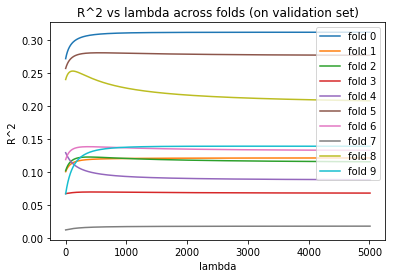

In [11]:
figure_num = 0
plt.figure(figure_num)
figure_num += 1
legend_arr = []
for i in range(K_FOLD):
    plt.plot(lambda_arr, double_dict_valid[i].values())
    legend_arr.append('fold ' + str(i))
plt.legend(legend_arr)
plt.title('R^2 vs lambda across folds (on validation set)')
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.show(block=False)

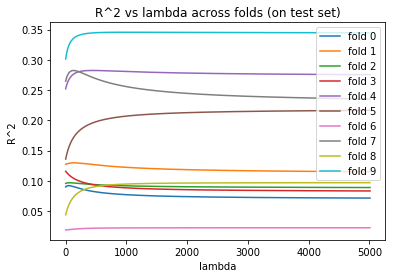

In [12]:
plt.figure(figure_num)
figure_num += 1
legend_arr = []
for i in range(K_FOLD):
    plt.plot(lambda_arr, double_dict_test[i].values())
    legend_arr.append('fold ' + str(i))
plt.legend(legend_arr)
plt.title('R^2 vs lambda across folds (on test set)')
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.show(block=False)

In [13]:
lambda_dict_valid = dict()
for lambda_ in lambda_arr:
    R2_values = [double_dict_valid[int(k)][lambda_] for k in double_dict_valid]
    lambda_dict_valid[lambda_] = np.mean(R2_values)

In [14]:
lambda_dict_test = dict()
for lambda_ in lambda_arr:
    R2_values = [double_dict_test[int(k)][lambda_] for k in double_dict_test]
    lambda_dict_test[lambda_] = np.mean(R2_values)

In [15]:
lambda_optimal = max(lambda_dict_valid, key=lambda k: lambda_dict_valid[k])
print('Optimal lambda:', lambda_optimal,
      '\nCorresponding R^2 in validation set:', lambda_dict_valid[lambda_optimal], 
      '\nCorresponding R^2 in test set:', lambda_dict_test[lambda_optimal])

Optimal lambda: 393.72263299634835 
Corresponding R^2 in validation set: 0.152598818091637 
Corresponding R^2 in test set: 0.16042298116698678


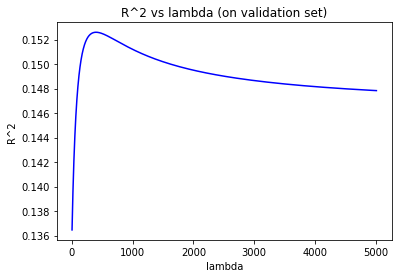

In [16]:
figure_num = 0
lists1 = sorted(lambda_dict_valid.items()) # list of tuples sorted by key
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
plt.figure(figure_num)
figure_num += 1
plt.plot(x1, y1, color='b')
plt.ylabel('R^2')
plt.xlabel('lambda')
plt.title('R^2 vs lambda (on validation set)')
plt.show()

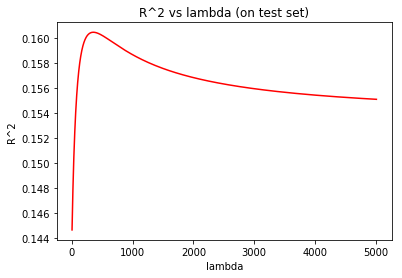

In [17]:
lists2 = sorted(lambda_dict_test.items()) # list of tuples sorted by key
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.figure(figure_num)
figure_num += 1
plt.plot(x2, y2, color='r')
plt.ylabel('R^2')
plt.xlabel('lambda')
plt.title('R^2 vs lambda (on test set)')
plt.show()